 <table style="width:100%">
  <tr style="background-color:#002147">
    <th><p style="color:white">Professional Programme, Department of Computer Science, University of Oxford</th> 
  </tr>
</table>



#  Things of the Internet (TOI) - Lab 2: Medium Access Control (MAC) Protocols


##  Introduction

In this practical, we will implement some contention-free (TDMA) and contention-based (Aloha and CSMA) MAC protocols, and study their performance in different context. In this lab, the Python kernel will researt everytime you run an experiment, so the program will intentionally shut down the kernel everytime. If you see the warning "The kernel appears to have died. It will restart automatically.", it's completely normal and you do not need to do anything about it.

### 1 Performance Metrics
To evaluate the performance of a MAC protocol, we consider the following two metrics.

**Utilisation *U***, which is the ratio of the total throughput of all nodes to the maximum data rate of the channel. Intuitively, higher utilisation means the protocol uses the wireless channel better, without unnecessary idle. 

**Fairness *F***, which is defined as: 
<img src="fig1.png" style="zoom:40%" />
Here N is the total amount of nodes, Ui  is the utilisation of each node. Clearly, if just one node occupies the channel, F would be 1/N, which is the worst case. If all nodes use the channel equally, F would be 1, which is the best case we want to achieve. 

### 2 The WSim simulator 

In this practical, we will primarily use the WSim simulator. It is a simple packet level network simulator for a shared media network. In WSim, all the nodes run the same MAC protocol, and it executes a set of steps every time slot (time increments by 1 each slot). You will have the full access to the source code, and you can implement your own protocols as you wish. For this practical, we have provided the code template that runs, and your main task is to understand and compare different MAC protocols.

### 3 TDMA 
In this set of tasks, you will learn how to use the WSim simulator by running simulations of TDMA. As discussed in the lecture, TDMA divides time into slots (assume the length of each slot is 1), and the nodes send data one by one. Say we have $N$ nodes. Then at time $t$, the $i$-th node will transmit if and only if:
- It has some data to send; and 
- $t$ mod $N$ == $i$

Run the following command:

  Node 0 attempts 236 success 236 coll 0
  Node 1 attempts 248 success 248 coll 0
  Node 2 attempts 228 success 228 coll 0
  Node 3 attempts 225 success 225 coll 0
  Node 4 attempts 228 success 228 coll 0
  Node 5 attempts 198 success 198 coll 0
  Node 6 attempts 239 success 239 coll 0
  Node 7 attempts 234 success 233 coll 0
Time 2000 attempts 1836 success 1835 util 0.92
Inter-node fairness: 1.00
Inter-node weighted fairness: 1.00


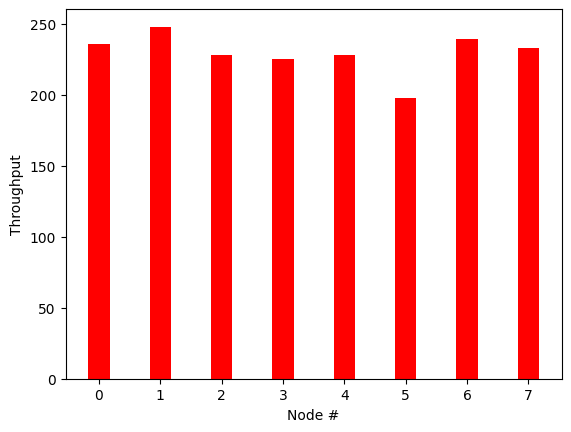

In [ ]:
#Time Division Multiple Access (TDMA)
import os
import random, sys, wx, math, time
from optparse import OptionParser
from p2_wsim import *
import matplotlib.pyplot as p

###############################################################

class TDMANode(WirelessNode):
    def __init__(self, location, network, retry):
        WirelessNode.__init__(self, location, network, retry)
        # any additional state or variables may be set here

    def channel_access(self, time, ptime, numnodes):
        if (time/ptime) % (numnodes) == self.get_id():
            return True
        else:
            return False

    def on_collision(self, packet):
        pass

    def on_xmit_success(self, packet):
        pass

################################################################

class TDMAWirelessNetwork(WirelessNetwork):
    def __init__(self, n, chantype, ptime, dist, load, retry, backoff,
                 skew=SOURCE_NOSKEW, qmax=0, simtime=10000):
        WirelessNetwork.__init__(self, n, chantype, ptime, dist, load, retry, backoff,
                                 skew, qmax, simtime)
    def make_node(self, loc, retry):
        return TDMANode(loc, self, retry)

################################################################

if __name__ == '__main__':
    random.seed(6172538) # uncomment this line for repeatability
    ## Task 3.2 to Task 3.5
    ## TODO: modify the below parameters
    gui = False
    numnodes = 8
    simtime = 2000
    ptime = 1
    load = 100
    retry = True
    skew = False
    
    wnet = TDMAWirelessNetwork(numnodes, 'TDMA', ptime,
                               'exponential', load, retry, 'None',
                               skew, 0, simtime)
    if gui == True:
        sim = NetSim()
        sim.SetNetwork(wnet)
        sim.MainLoop()
    else:
        wnet.step(simtime)
        succ = []
        for node in wnet.nlist: succ.append(node.stats.success)
        for node in wnet.nlist:
            if node.stats.collisions > 0:
                print("ERROR! TDMA should not have collisions")
        ind = numpy.arange(len(wnet.nlist))
        width = 0.35
        p.bar(ind, succ, width, color = 'r')
        p.ylabel('Throughput')
        p.xlabel('Node #')
        p.show()
        time.sleep(5)
    os._exit(0)

This should bring up the GUI of the simulator as follows: 

<img src="fig2.png" style="zoom:75%" />

_N.B. If running on a Mac, the button labels on the bottom may not show if you are in "Dark Mode", so change to "Light Mode" if you experience this issue._

Each black block is a node, where A is the number of packets it has tried to send, S is the number of success, and Q is packages left in its queue. The bottom is the commands you can use, and the left panel shows the parameters.
Set the parameters as follows, and click “Reset” to update the GUI:
 
<img src="fig3.png" style="zoom:75%" />

Now you can run the simulation, either manually (click “Step 1”, “Step 10”, …), or automatically (click “Play”). To speed up, you can click “Step all”. For now you shouldn’t see any meaningful output, but when you finish Task 1.3.1, you should be able to see the statistics in the terminal window:

<img src="fig4.png" style="zoom:100%" />

Or more conveniently, you may use modify the code to directly set the parameters. Setting *gui* to False, you may directly see the final results and a bar chart showing the throughput of each node. You could set the following parameters:

| Parameter Name | Description | Default Value |
| :------: | :------: | :------: |
| gui | GUI trigger | True |
| numnodes | Number of nodes | 16 |
| simtime | Simulation time | 10000 |
| ptime | Packet size (in time unit) | 1 (time slot) |
| load | Total load % (in pkts/timeslot) | 100 |
| retry | Retry packet after failure | False |
| skew | Skew of the load | False |

In particular, *skew* specifies whether the load between nodes are “skewed”. When this is set to be true, the maximum possible throughout of between nodes nodes will obey a geometrically-spaced amounts, i.e., Node 0 has the throughput of U/2, node 1 of U/4, node 2 a load of U/8 and so on. The last two nodes each present the same load, U/2N-1. You can think that in this case, some nodes have much more battery power, so it could send packets more frequently than the others.

**Task 3.1**: We have provided the code skeleton in the above code cell. Implement the channel_access(self,time,ptime,numnodes) function, which schedules the nodes to access the wireless channel. The input parameter time is the current time on the node, ptime is the size of the packet, and numnodes is the total amount of node in the network. You can get the id of current node by calling self.get_id() function. Your function should True if the channel is clear to send, and False otherwise. 

**Task 3.2**: Vary the packet size ranging from 1 to 10. What happens in terms of utilisation and fairness and why?

Your answer: Decreases

**Task 3.3**: In practice, if we typically have very large packets, will TDMA perform well?

Your answer: No

**Task 3.4\***: (optional) Try to play with the *retry* parameter. If it is set to be True, will TDMA perform better? Why?

Your answer: 

**Task 3.5\***: (optional) Try to play with the *skew* parameter. Check both the utilisation and fairness: can you see the problem? Can you explain why? Note that in this case we should care about the “Inter-node weighted fairness”, which describes the fairness given the actual load of the nodes, i.e. it is fair to allow nodes with higher load to use the channel more.

Your answer: 

### 4 Stabling Slotted Aloha with Backoff
Now you are familiar with the WSim simulator. In this practical, we will explore how to stable Aloha with a backoff strategy. As explained in the lecture, if a node fails to transmit a packet, it retransmits at a future slot with a certain probability p. This approach is not stable, since in practice for different amount of nodes with different loads, the optimal p value is unknown. To address this problem, we should consider a smarter strategy. 

In fact, the search for the right p can be guided by feedback: if a packet transmission is unsuccessful, we should decrease p, and vice versa. For example, you can use the binary exponential rule described in the lectures.

A skeleton code is given below.

In [ ]:
#Stabilizing the Aloha protocol using random backoffs
import os
import random, sys, wx, math, time
from optparse import OptionParser
from p2_wsim import *
import matplotlib.pyplot as p
import numpy.random as nprand

###############################################################

class AlohaNode(WirelessNode):
    def __init__(self, location, network, retry):
        WirelessNode.__init__(self, location, network, retry)

        # for plots of collisions/success
        self.sent = []
        self.coll = []

        # initialize local probability of transmission
        self.p = self.network.pmax

    def channel_access(self, time, ptime, numnodes):
        if (time % ptime == 0) and nprand.rand() < self.p: 
            return True
        else:
            return False

    def on_collision(self, packet):
        # for plots of collisions
        self.coll.append(self.network.time)
        self.p = max(self.p/2, self.pmin)

    def on_xmit_success(self, packet):
        # for plots of success
        self.sent.append(self.network.time)
        self.p = min(self.p*2, self.pmax)

################################################################

class AlohaWirelessNetwork(WirelessNetwork):
    def __init__(self, n, chantype, ptime, dist, load, retry, backoff,
                 skew, qmax, pmax, pmin, simtime):
        self.pmax = pmax
        self.pmin = pmin
        WirelessNetwork.__init__(self, n, chantype, ptime, dist, load, retry, backoff,
                                 skew, qmax, simtime)

    def make_node(self, loc, retry):
        return AlohaNode(loc, self, retry)

################################################################

if __name__ == '__main__':
    random.seed(6172538) # For repeatability
    
    ## Task 4.3 to Task 4.7
    ## TODO: modify the below parameters
    gui = False
    numnodes = 16
    simtime = 10000
    backoff = 'Mine' # backoff scheme (Mine, None)
    ptime = 1
    pmax = 1.0 # max probability of xmission
    pmin = 0.0 # min probability of xmission
    load = 100
    retry = False
    skew = False
    
    print('Protocol: Aloha with stabilization')
    wnet = AlohaWirelessNetwork(numnodes, 'Aloha', ptime,
                                'exponential', load, retry, backoff,
                                skew, 0, pmax, pmin, simtime)

    if gui == True:
        sim = NetSim()
        sim.SetNetwork(wnet)
        sim.MainLoop()
    else:
        wnet.step(simtime)
        plot_data(wnet)         # in p1_wsim
        time.sleep(5)
    os._exit(0)

**Task 4.1**: We have provided the code skeleton above. Implement the *channel_access(self,time,ptime,numnodes)* function, to simulate the behaviour of slotted Aloha. The input parameter time is the current time on the node, ptime is the size of the packet, and numnodes is the total amount of node in the network. You can retrieve the current probability of whether transmit or not by calling *self.p*. Your function should True if the channel is clear to send, and False otherwise. 

**Task 4.2**: Implement some behaviour to vary the backoff probability as in the functions `on_collision(self,packet)` and `on_xmit_success(self,packet)`. The `packet` input parameter is the actual packet the node tries to send, although you don’t need to use it for this task. To help you understand the code, here is some extra information: 

- `self.p` is the current p of the node

- `self.network.pmin` is the minimum probability pmin, which is the minium p you would like to set.

- `self.network.pmax` is the maximum probability pmax, which is the maximum p you would like to set.

Note that here we want the slotted Aloha, i.e. the length of the time slot is the same as the packet size, and the nodes only try to transmit at the beginning of each time slot.  

**Task 4.3**: Test your code with different pmin and pmax values, e.g.,

- ptime = 10
- simtime = 10000
- retry = True
- numnodes = 8
- pmin = 0.05
- pmax = 0.95

When you vary the value of pmin and pmax, what do you observe? The top of the result fig shows the successful/collided packets across time, and the bottom is the throughput of each node.

Your answer: 

**Task 4.4**: Test your code with the extreme case where pmin == pmax, e.g.,

- ptime = 10
- simtime = 10000
- retry = True
- numnodes = 8
- pmin = 0.3
- pmax = 0.3

Comparing to using different pmin and pmax, what do you observe? Why?

Your answer:

**Task 4.5\***: (optional) Run the following two simulations to compare the performance of the stabilised Aloha with TDMA: 

Parameters for the stabilised Aloha:

- ptime = 10
- simtime = 10000
- retry = True
- numnodes = 8
- pmin = 0.3
- pmax = 0.3

Parameters for TDMA

- ptime = 10
- simtime = 10000
- numnodes = 8

What can you observe? 

Your answer:

**Task 4.6\***: (optinal) Recall that TDMA has problems with skewed load. Run the following two simulations to compare the performance of the stabilised Aloha with TDMA:

Parameters for the stabilised Aloha:

- ptime = 10
- simtime = 10000
- retry = True
- numnodes = 8
- pmin = 0.3
- pmax = 0.3
- skew = True

Parameters for TDMA

- ptime = 10
- simtime = 10000
- numnodes = 8
- skew = True

What can you observe? Why? Now change the node number to 32, what happens? What about 64, or 128 nodes?

Your answer: 

**Task 4.7\***: (optional) Can you think of different increasing/decreasing rules? Try to implement them and check their performance. 

Your answer:

### 5 CSMA
Now let’s see how CSMA works in practice, and compare it with TDMA and the stabilised Aloha. Unlike TDMA or Aloha, CSMA sense the wireless channel before trying to send any data. We consider the same stabilisation approach as in the stabilised Aloha, i.e. each node has a probability p to transmit, which will increase if successful, and decrease otherwise.

A skeleton code is provided below:

In [ ]:
# Carrier Sense Multiple Access (CSMA)
import os
import random, sys, wx, math, time
from optparse import OptionParser
from p2_wsim import *
import matplotlib.pyplot as p
import numpy.random as nprand

###############################################################

class CSMANode(WirelessNode):
    def __init__(self, location, network, retry):
        WirelessNode.__init__(self, location, network, retry)

        # for plots of collisions/success
        self.sent = []
        self.coll = []

        # initialize local probability of transmission
        self.p = self.network.pmax

    def channel_access(self, time, ptime, numnodes):
        ## Task 5.1
        ## TODO: decide whehter to transmit
        ## You can tell if the channel is busy or not using
        ## the self.network.channel_busy() function call.
        pass

    def on_collision(self, packet):
        # for plots of collisions
        self.coll.append(self.network.time)

        ## Task 5.2
        ## TODO:Decrease the probability
        pass

    def on_xmit_success(self, packet):
        # for plots of successful transmissions
        self.sent.append(self.network.time)

        ## Task 5.2
        ## TODO:Increase the probability
        pass

################################################################

class CSMAWirelessNetwork(WirelessNetwork):
    def __init__(self, n, chantype, ptime, dist, load, retry, backoff,
                 skew, qmax, pmax, pmin, simtime):
        self.pmax = pmax
        self.pmin = pmin
        WirelessNetwork.__init__(self, n, chantype, ptime, dist, load, retry, backoff,
                                 skew, qmax, simtime)

    def make_node(self, loc, retry):
        return CSMANode(loc, self, retry)

################################################################

if __name__ == '__main__':
    random.seed(6172538) # For repeatability
    
    ## Task 5.3 to Task 5.5
    ## TODO: modify the below parameters
    gui = False
    numnodes = 16
    simtime = 10000
    backoff = 'Mine' # backoff scheme (Mine, None)
    ptime = 1
    pmax = 1.0 # max probability of xmission
    pmin = 0.0 # min probability of xmission
    load = 100
    retry = False
    skew = False
    
    print('Protocol: CSMA with stabilization')
    wnet = CSMAWirelessNetwork(numnodes, 'CSMA', ptime,
                               'exponential', load, retry, backoff,
                               skew, 0, pmax, pmin, simtime)

    if gui == True:
        sim = NetSim()
        sim.SetNetwork(wnet)
        sim.MainLoop()
    else:
        wnet.step(simtime)
        plot_data(wnet)         # in p1_wsim)
        time.sleep(5)
    os._exit(0)

**Task 5.1**: We have provided the code skeleton above. Implement the function *channel_access(self,time,ptime,numnodes)*, to sense the wireless channel before sending. The input parameter *time* is the current timestamp maintained by the node, *ptime* is the length of the packet to be sent, and *numnodes* is the total number of nodes. In this task, you don’t need to worry about the input parameters, and your code should return True if it is clear to send, and False otherwise. You can tell if the channel is busy or not by calling the function *self.network.channel_busy()*. Note that unlike the previous slotted Aloha, here we should allow packet size to be different from the slot size, e.g. the nodes can transmit packets of length 10 at the beginning of each timestamp. Also, don’t forget the node has to transmit according the probability *p*.

**Task 5.2**: Implement the increasing and decreasing rules in functions *on_collision (self,packet)* and *on_xmit_success (self,packet)*. As in the previous practical, you know the following: 

- *self.p*  the current p of the node
- *self.network.pmin* the minimum probability pmin, which is set beforehand.
- *self.network.pmax* the maximum probability pmax, which is set beforehand.

**Task 5.3**: Run the following simulation (note that here we set the packet size to 1):  

CSMA, parameters:

- retry = True
- numnodes = 8
- ptime = 1
- simtime = 10000
- pmin = 0.05
- pmax = 0.95

Stablised Aloha

- retry = True
- numnodes = 8
- ptime = 1
- simtime = 10000
- pmin = 0.05
- pmax = 0.95

What do you observe?

Your answer:

**Task 5.4**: Now we change the packet size to 10, and re-run the two simulations in Task 5.3:

CSMA, parameters:

- retry = True
- numnodes = 8
- ptime = 10
- simtime = 10000
- pmin = 0.05
- pmax = 0.95

Stablised Aloha

- retry = True
- numnodes = 8
- ptime = 10
- simtime = 10000
- pmin = 0.05
- pmax = 0.95

What do you observe?

Your answer:

**Task 5.5\***: (optional) Now set the source skew to True. Try the following simulations:

TDMA

- numnodes = 8
- ptime = 10
- simtime = 10000
- skew = True

CSMA, parameters:

- retry = True
- numnodes = 8
- ptime = 10
- simtime = 10000
- pmin = 0.05
- pmax = 0.95
- skew = True

Stablised Aloha

- retry = True
- numnodes = 8
- ptime = 10
- simtime = 10000
- pmin = 0.05
- pmax = 0.95
- skew = True

Does CSMA suffer from load skewness? Now vary the node number to 32, 64, and 128. Does CSMA also scales better?

Your answer: